In [47]:
from collections import defaultdict, deque

class Grafo:
    def __init__(self):
        self.grafo = defaultdict(list)

    def add_arista(self, u, v):
        self.grafo[u].append(v)
        self.grafo[v].append(u)
    
    def bfs(self, inicio, destino):
        visitados = set()
        cola = deque()
        cola.append((inicio, [inicio]))
        
        while cola:
            vertice, camino = cola.popleft()
            if vertice == destino:
                return camino
            if vertice in visitados:
                continue
            visitados.add(vertice)
            for vecino in self.grafo[vertice]:
                if vecino not in camino:
                    nuevo_camino = list(camino)
                    nuevo_camino.append(vecino)
                    cola.append((vecino, nuevo_camino))

In [48]:
grafo = Grafo()
grafo.add_arista(0, 1)
grafo.add_arista(0, 2)
grafo.add_arista(1, 2)
grafo.add_arista(1, 3)
grafo.add_arista(2, 3)
grafo.add_arista(3, 4)
grafo.add_arista(4, 5)
grafo.add_arista(5, 6)
grafo.add_arista(5, 7)
grafo.add_arista(5, 8)
grafo.add_arista(6, 7)

In [49]:
resultado = grafo.bfs(0, 7)

In [50]:
print(resultado)

[0, 1, 3, 4, 5, 7]


In [7]:
print(grafo.grafo)

defaultdict(<class 'list'>, {0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7, 8], 6: [5, 7], 7: [5, 6], 8: [5]})


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

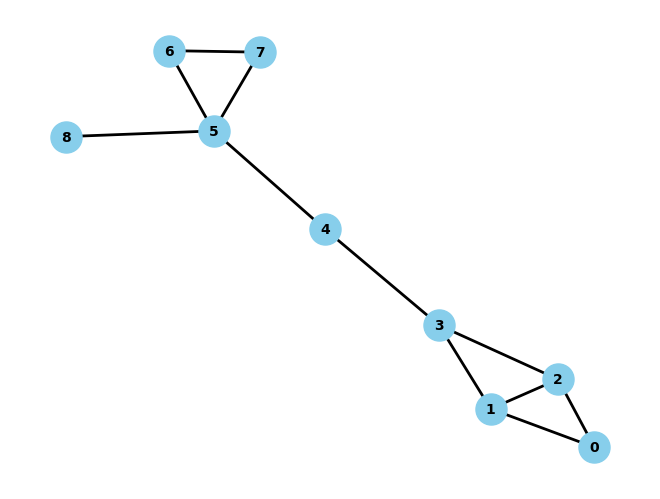

In [51]:
G = nx.Graph()
for nodo, vecinos in grafo.grafo.items():
    G.add_node(nodo)
    for vecino in vecinos:
        G.add_edge(nodo, vecino)
        
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black',
        font_weight='bold', width=2)
plt.show()